In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

This dataset is a Wireless Indoor Localization set, it contains wifi signal strength from cell phones and a classification column of what room the cell phone is in based on wifi-signal. There are 4 rooms. Because it's wifi signals, the cleaning and pre-processing should be relatively straight forward as well. 

In [152]:
wf = pd.read_csv('wifi_localization.txt',sep="\t", header = None)
wf.columns = ["a", "b", "c", "d", 'e', 'f','g', 'room']

In [153]:
wf.sample(5)

,a,b,c,d,e,f,g,room
1155,-50,-52,-52,-56,-67,-80,-89,3
1237,-48,-46,-50,-54,-63,-87,-77,3
1180,-51,-52,-50,-56,-67,-79,-91,3
1071,-54,-59,-52,-63,-62,-76,-81,3
76,-60,-57,-55,-66,-69,-82,-89,1


In [154]:
wf['room'].value_counts()

4    500
3    500
2    500
1    500
Name: room, dtype: int64

Perfect, it's an equal amount per room. 

In [155]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
a       2000 non-null int64
b       2000 non-null int64
c       2000 non-null int64
d       2000 non-null int64
e       2000 non-null int64
f       2000 non-null int64
g       2000 non-null int64
room    2000 non-null int64
dtypes: int64(8)
memory usage: 125.1 KB


No null values, all int64. This is beautiful. 

In [156]:
wf.describe()

,a,b,c,d,e,f,g,room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


Let's just take a quick look at the shape of our data. 

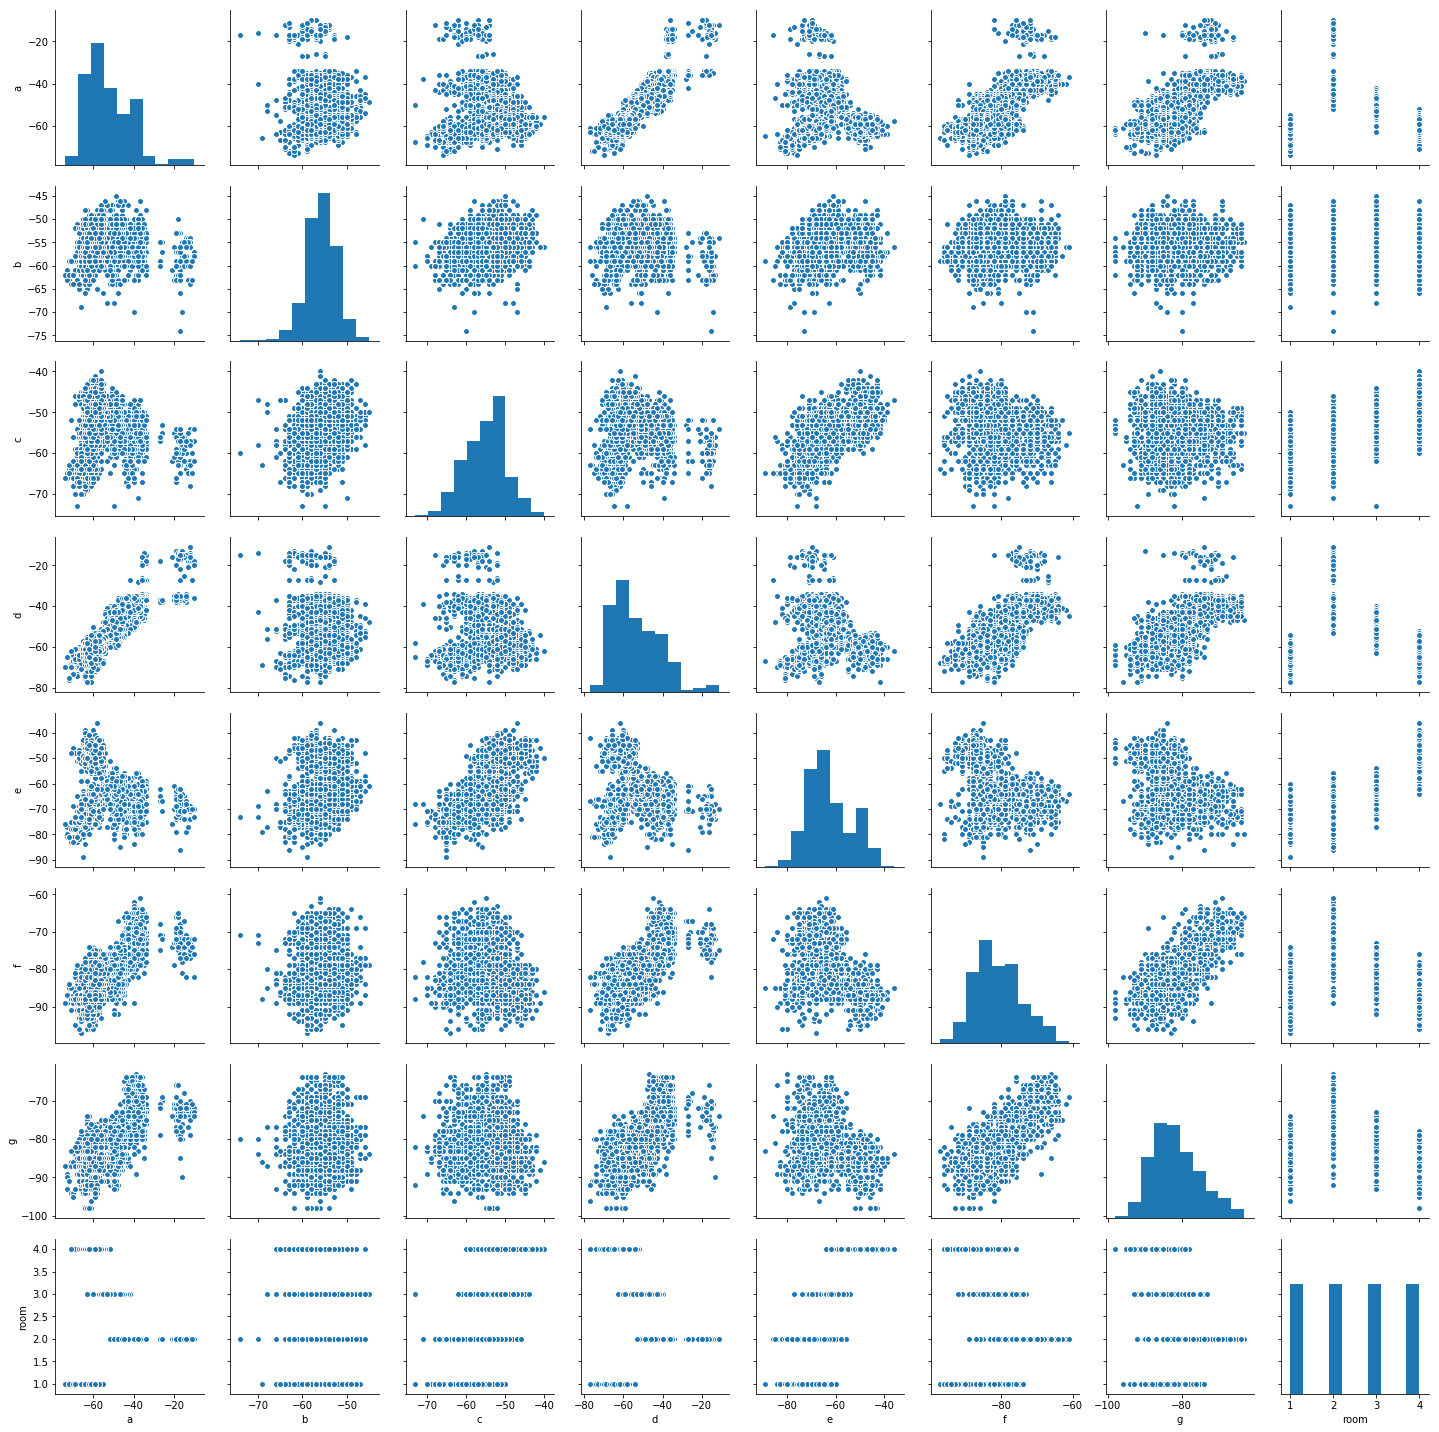

In [157]:
g = sns.pairplot(wf)

Okay, nothing crazy, let's move to modeling. 

## Modeling

We'll first assign our variables to X and our outcome to Y.  We have Contingency Tables and ARI as our methods of evaluation. 

We already know that our orignial ground truths are 25% each. 

In [158]:
X = wf.drop('room', axis =1)
Y = wf.room

### 1000 X 1 normal parameters

In [181]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [182]:
# Get predicted clusters.
full_pred = mlp.predict(X)
pd.crosstab(Y, full_pred)

col_0,1,2,3,4
room,,,,
1,498,0,2,0
2,0,482,18,0
3,8,11,478,3
4,1,0,3,496


In [183]:
from sklearn import metrics
    
metrics.adjusted_rand_score(Y, full_pred)

0.9403257693355008

In [184]:
cv = cross_val_score(mlp, X, Y, cv=10)
print('Cross Validation Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))


Cross Validation Scores: 0.97200(+/- 0.04)


Well, this first models performs reasonably well. Let's see what happens if we cut down the width. 

### 300 X 1 normal parameters

In [191]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 300 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(300))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=300, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [195]:
# Get predicted clusters.
full_pred_1 = mlp.predict(X)
pd.crosstab(Y, full_pred_1)

col_0,1,2,3,4
room,,,,
1,498,0,1,1
2,0,476,24,0
3,11,6,478,5
4,1,0,2,497


In [192]:
metrics.adjusted_rand_score(Y, full_pred_1)

0.9367842986349852

In [193]:
cv = cross_val_score(mlp1, X, Y, cv=10)
print('Cross Validation Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))


Cross Validation Scores: 0.96250(+/- 0.03)


This didn't change things much, but it ran quickly and it was slightly more consistent, we'll stick with 300. Logistic Activation worked very well for me in the previous exercise, lets try that. 

### 300 X 1 logistic activation

In [196]:
# Establish and fit the model, with a single, 300 perceptron layer.
mlp2 = MLPClassifier(hidden_layer_sizes=(300), activation = 'logistic')
mlp2.fit(X, Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=300, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [198]:
# Get predicted clusters.
full_pred_2 = mlp2.predict(X)
pd.crosstab(Y, full_pred_2)

col_0,1,2,3,4
room,,,,
1,496,0,3,1
2,0,479,21,0
3,5,7,485,3
4,0,0,3,497


In [199]:
metrics.adjusted_rand_score(Y, full_pred_2)

0.9440063603789496

In [204]:
cv = cross_val_score(mlp2, X, Y, cv=10)
print('Cross Validation Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))

Cross Validation Scores: 0.97600(+/- 0.03)


We got a little bit more accurate, and the variance stayed the same. Let's add some layers. 

## 300 X 3 with logistic activation

In [201]:
# Establish and fit the model, with a single, 300 perceptron layer.
mlp3 = MLPClassifier(hidden_layer_sizes=(300, 300, 300), activation = 'logistic')
mlp3.fit(X, Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [202]:
# Get predicted clusters.
full_pred_3 = mlp3.predict(X)
pd.crosstab(Y, full_pred_3)

col_0,1,2,3,4
room,,,,
1,494,0,5,1
2,0,482,18,0
3,3,12,481,4
4,0,0,1,499


In [203]:
metrics.adjusted_rand_score(Y, full_pred_3)

0.9428478697389063

In [205]:
cv = cross_val_score(mlp3, X, Y, cv=10)
print('Cross Validation Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))

Cross Validation Scores: 0.97250(+/- 0.03)


Another jump in accuracy while keeping our variance the same. This is our best model so far. 

### 300 X 3 with logistic activation and higher alpha

In [210]:
# Establish and fit the model, with a single, 300 perceptron layer.
mlp4 = MLPClassifier(hidden_layer_sizes=(300, 300, 300),
                     activation = 'logistic',
                    alpha = .00001)
mlp4.fit(X, Y)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [211]:
# Get predicted clusters.
full_pred_4 = mlp4.predict(X)
pd.crosstab(Y, full_pred_4)

col_0,1,2,3,4
room,,,,
1,494,0,5,1
2,0,460,40,0
3,2,1,494,3
4,0,0,2,498


In [212]:
metrics.adjusted_rand_score(Y, full_pred_4)

0.9302490128317757

In [213]:
cv = cross_val_score(mlp4, X, Y, cv=10)
print('Cross Validation Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))

Cross Validation Scores: 0.97200(+/- 0.03)


ARI took a hit but the overall accuracy and varience stayed the same. Let's try changing the solver. 

### 300 X 3 Logistic Activation, sgd solver, adaptive learning rate. 

In [215]:
mlp5 = MLPClassifier(hidden_layer_sizes=(300,300, 300), 
                    activation = 'logistic',
                   solver = 'sgd',
                   learning_rate = 'adaptive')

mlp5.fit(X, Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300, 300), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [225]:
# Get predicted clusters.
full_pred_5 = mlp5.predict(X)
pd.crosstab(Y, full_pred_5)

col_0,1,2,3,4
room,,,,
1,293,0,0,207
2,116,331,23,30
3,178,2,16,304
4,0,0,0,500


In [226]:
metrics.adjusted_rand_score(Y, full_pred_5)

0.27302051703056657

In [227]:
cv = cross_val_score(mlp5, X, Y, cv=10)
print('Cross Validation Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))

Cross Validation Scores: 0.63550(+/- 0.41)


Well this does horribly. Let's move on to Gradient Boosting to see how well that does compared to 300x3 with Logistic Activation:  0.97250(+/- 0.03)

### Gradient Boosting

In [221]:
#instantiating and fitting the model
gbc = GradientBoostingClassifier()
gbc.fit(X, Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [224]:
# 10-fold cross validation
cv = cross_val_score(gbc, X, Y, scoring='adjusted_rand_score', cv=10)
print('Cross Validation Adjusted Scores: {:.5f}(+/- {:.2f})'.format(cv.mean(), cv.std()*2))

Cross Validation Adjusted Scores: 0.93412(+/- 0.07)


### Summary

I love Nueral Networks. It was very easy to work with multi-label classification and these ran suprisingly well, even though I intentionally picked a smaller dataset to make my life easier. 

I am slightly concerned that the GBC isn't supposed to be used for multi-label classification. I was also very suprised 